# MATH 210 Introduction to Mathematical Computing

## November 18, 2020

* What you are expected to know for MATH 210
* Euler's 3-body problem
* Mathematical model of infectious diseases

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## What you are expected to know for MATH 210

We are approximating solutions of systems of differential equations. However, I do **not** expect you to derive equations from physical laws. The examples we do below are fun and interesting but it is not necessary for you to know where they come from or how to prove them. Instead, I expect MATH 210 to be able to:

* Write a higher order system of differential equations as a first order system
* Compute approximations of solutions of first order systems using `scipy.integrate.odeint`
* Plot solutions for different initial conditions

## Euler's 3-body problem

[Euler's 3-body problem](https://en.wikipedia.org/wiki/Euler%27s_three-body_problem) studies a planet orbiting two stars fixed in space. This is physically impossible since the stars would be pulled together by the force of gravity but this simplification makes the equations easier to handle.

Let $(x(t),y(t))$ be the position of a planet orbiting two stars. Let $m_1$ and $m_2$ be the masses (in solar mass) of star 1 and star 2 respectively. Let $(x_1,y_1)$ and $(x_2,y_2)$ be the fixed positions of star 1 and star 2 respectively. The equations of motion of the planet from Newton's Law become

\begin{align*}
x'' &= - \frac{4 \pi^2 m_1 (x - x_1)}{((x - x_1)^2 + (y - y_1)^2)^{3/2}} - \frac{4 \pi^2 m_2 (x - x_2)}{((x - x_2)^2 + (y - y_2)^2)^{3/2}} \\
y'' &= - \frac{4 \pi^2 m_1 (y - y_1)}{((x - x_1)^2 + (y - y_1)^2)^{3/2}} - \frac{4 \pi^2 m_2 (y - y_2)}{((x - x_2)^2 + (y - y_2)^2)^{3/2}}
\end{align*}

where time is measured in years, distance in AU (astronomical unit, distance from Earth to the Sun) and mass in solar mass (multiples of our Earth's Sun), and the gravitational constant is $G = 4 \pi^2$.

Write a function called `euler3body` which takes input parameters `u0`, `t`, `m1`, `p1`, `m2` and `p2` where:

* `u0 = [x(0),dxdt(0),y(0),dydt(0)]` is the vector of initial values of the planet
* `t` is the array of $t$ values
* `m1` and `m2` are the masses of star 1 and star 2 (in solar mass) respectively
* `p1` and `p2` are the positions vectors `[x1,y1]` and `[x2,y2]` of star 1 and star 2 respectively

The function returns an array of size `len(t) x 2` with the corresponding `x` and `y` values of the solution in the columns.

In [2]:
def euler3body(u0,t,m1,p1,m2,p2):
    def odefun(u,t):
        dudt = np.array([0., 0., 0., 0.])
        d1 = np.sqrt((u[0] - p1[0])**2 + (u[2] - p1[1])**2)
        d2 = np.sqrt((u[0] - p2[0])**2 + (u[2] - p2[1])**2)
        dudt[0] = u[1]
        dudt[1] = -4*np.pi**2*(m1*(u[0] - p1[0])/d1**3 + m2*(u[0] - p2[0])/d2**3)
        dudt[2] = u[3]
        dudt[3] = -4*np.pi**2*(m1*(u[2] - p1[1])/d1**3 + m2*(u[2] - p2[1])/d2**3)
        return dudt
    u = spi.odeint(odefun,u0,t)
    x = u[:,0]
    y = u[:,2]
    return np.column_stack((x,y))

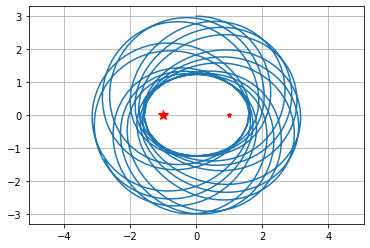

In [3]:
u0 = [0,5,3,0]
t = np.linspace(0,30,1000)
m1 = 2; m2 = 1;
p1 = [-1,0]; p2 = [1,0];
p = euler3body(u0,t,m1,p1,m2,p2)
plt.plot(p[:,0],p[:,1])
plt.plot(p1[0],p1[1],'r*',ms=5*m1)
plt.plot(p2[0],p2[1],'r*',ms=5*m2)
plt.grid(True), plt.axis('equal')
plt.show()

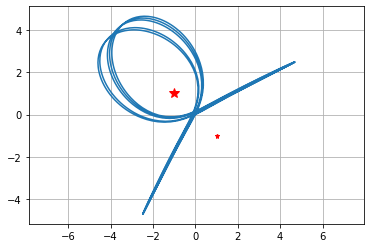

In [4]:
u0 = [0,10,0,5]
t = np.linspace(0,30,1000)
m1 = 2; m2 = 1;
p1 = [-1,1]; p2 = [1,-1];
p = euler3body(u0,t,m1,p1,m2,p2)
plt.plot(p[:,0],p[:,1])
plt.plot(p1[0],p1[1],'r*',ms=5*m1)
plt.plot(p2[0],p2[1],'r*',ms=5*m2)
plt.grid(True), plt.axis('equal')
plt.show()

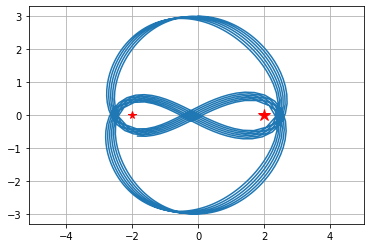

In [5]:
u0 = [0,4.8,3,0]
t = np.linspace(0,20,1000)
m1 = 1.5; m2 = 2.5;
p1 = [-2,0]; p2 = [2,0];
p = euler3body(u0,t,m1,p1,m2,p2)
plt.plot(p[:,0],p[:,1])
plt.plot(p1[0],p1[1],'r*',ms=5*m1)
plt.plot(p2[0],p2[1],'r*',ms=5*m2)
plt.grid(True), plt.axis('equal')
plt.show()

## Mathematical model of infectious diseases

The SIR model is a simple [mathematical model of infectious diseases](https://en.wikipedia.org/wiki/Mathematical_modelling_of_infectious_disease). It consists of 3 compartments: susceptible (S), infected (I) and recovered (R). The population moves from S to I, and from I to R over time. The rate of infection ($\frac{dS}{dt}$) is proportional to the interaction term $IS$, and the rate of recovery is $\gamma I$. The equations are given by: 

\begin{align*}
\frac{dS}{dt} &= - \frac{\beta I S}{N} \\
\frac{dI}{dt} &= \frac{\beta I S}{N} - \gamma I \\
\frac{dR}{dt} &= \gamma I \\
N &= S + I + R
\end{align*}

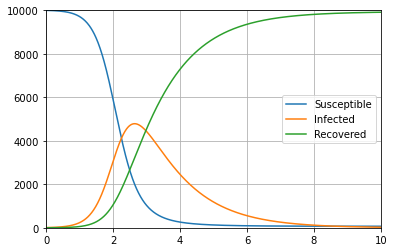

In [6]:
beta = 4; gamma = 0.8;
def odefun(u,t):
    S = u[0]; I = u[1]; R = u[2];
    N = S + I + R
    dSdt = -beta*I*S/N
    dIdt = beta*I*S/N - gamma*I
    dRdt = gamma*I
    return np.array([dSdt,dIdt,dRdt])

S0 = 10000; I0 = 10; R0 = 0; tf = 10
u0 = [S0,I0,R0]
t = np.linspace(0,tf,100*tf)
u = spi.odeint(odefun,u0,t)
S = u[:,0]; I = u[:,1]; R = u[:,2];
plt.plot(t,S,t,I,t,R)
plt.legend(['Susceptible','Infected','Recovered'])
plt.axis([0,tf,0,S0]), plt.grid(True)
plt.show()